In [1]:
# mutliple outputs in cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Imports and data folder path

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

colors = sns.color_palette("colorblind")
sns.set_palette(colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

PATH_IN = './Dataset/'

### Loading data

In [3]:
movie_fname = os.path.join(PATH_IN, 'movie.metadata.tsv')

movie_column_names = [
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date", 
    "Movie box office revenue", 
    "Movie runtime", 
    "Movie languages", 
    "Movie countries", 
    "Movie genres",
]

movies = pd.read_csv(movie_fname,  delimiter= '\t', names= movie_column_names)#, index_col=0)

movies.head()
movies.shape
movies.dtypes

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


(81741, 9)

Wikipedia movie ID            int64
Freebase movie ID            object
Movie name                   object
Movie release date           object
Movie box office revenue    float64
Movie runtime               float64
Movie languages              object
Movie countries              object
Movie genres                 object
dtype: object

### Fixing bad rows 1/2

In [4]:
movies.iloc[46808]["Movie countries"] #'{"/m/03rk0": "India"}'
movies.iloc[46808]["Movie languages"]
movies.iloc[46808]["Movie genres"]

'{"/m/0999q": "Malayalam Language"}'

'{"/m/0999q": "Malayalam Language"}'

'{"/m/01jfsb": "Thriller", "/m/02kdv5l": "Action", "/m/03k9fj": "Adventure", "/m/01chg": "Bollywood"}'

In [5]:
movies.iloc[67202]["Movie countries"] #'{"/m/03rk0": "India"}'
movies.iloc[67202]["Movie languages"] #{"/m/0999q": "Malayalam Language"}
movies.iloc[67202]["Movie genres"]

'{"/m/0999q": "Malayalam Language", "/m/03rk0": "India"}'

'{}'

'{"/m/068d7h": "Romantic drama"}'

In [6]:
movies.iloc[72685]["Movie countries"] #{"/m/084n_": "Weimar Republic", "/m/0345h": "Germany"}
movies.iloc[72685]["Movie languages"]
movies.iloc[72685]["Movie genres"]

'{"/m/084n_": "Weimar Republic", "/m/04306rv": "German Language", "/m/0345h": "Germany"}'

'{"/m/06ppq": "Silent film", "/m/04306rv": "German Language"}'

'{"/m/0hn10": "LGBT", "/m/06ppq": "Silent film", "/m/0219x_": "Indie", "/m/03q4nz": "World cinema", "/m/01g6gs": "Black-and-white", "/m/0bc42t_": "Gay Interest", "/m/07s9rl0": "Drama", "/m/0d63kt": "Gay", "/m/04tkhfk": "Gay Themed"}'

In [7]:
movies[movies['Movie genres'].str.contains(' Language')] # all good here

movies[movies['Movie countries'].str.contains(' Language')] # 3 rows to enhance

movies.loc[46808, 'Movie countries'] = '{"/m/03rk0": "India"}'
movies.loc[67202, 'Movie countries'] = '{"/m/03rk0": "India"}'
movies.loc[67202, 'Movie languages'] = '{"/m/0999q": "Malayalam Language"}'
movies.loc[72685, 'Movie countries'] = '{"/m/084n_": "Weimar Republic", "/m/0345h": "Germany"}'

movies[movies['Movie countries'].str.contains(' Language')] # check ✅

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
46808,17906864,/m/047p8zv,Moonnam Mura,1988,NaN,NaN,"{""/m/0999q"": ""Malayalam Language""}","{""/m/0999q"": ""Malayalam Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Actio..."
67202,28964840,/m/0dgnjfj,Inakkilly,1984,NaN,NaN,{},"{""/m/0999q"": ""Malayalam Language"", ""/m/03rk0"":...","{""/m/068d7h"": ""Romantic drama""}"
72685,5093828,/m/0d2clf,Sex in Chains,1928-10-24,NaN,86.0,"{""/m/06ppq"": ""Silent film"", ""/m/04306rv"": ""Ger...","{""/m/084n_"": ""Weimar Republic"", ""/m/04306rv"": ...","{""/m/0hn10"": ""LGBT"", ""/m/06ppq"": ""Silent film""..."


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres


### Fixing bad rows 2/2

In [8]:
movies[movies["Movie languages"].str.contains("\\\\ud")]
# "/m/0gtg": "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32" #language code, maybe add to probably_not_useful
#s_1825 = "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"
#s_7855 = "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"
#s_20807 = "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"
#s_25679 = "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"
#s_30562 = "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"
#s_68137 = "\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"

# movies.iloc[68137]["Movie languages"]

# https://github.com/hartwork/surrogates
#!pip3 install --user surrogates
#import surrogates
#surrogates.decode('\ud801\udc16'), surrogates.decode('\ud801\udc32'), surrogates.decode('\ud801\udc49'), surrogates.decode('\ud801\udc4b'), surrogates.decode('\ud801\udc4c'), surrogates.decode('\ud801\udc32')
# ('𐐖', '𐐲', '𐑉', '𐑋', '𐑌', '𐐲')

# A divine message from God using Deseret? https://en.wikipedia.org/wiki/Deseret_(Unicode_block)
# Deseret = University of Utah / Church of Jesus Christ of Latter-day Saints, 1847 and 1854
# films are from 2011, let's remove this cryptic message

movies.loc[1825, "Movie languages"] = '{"/m/04306rv": "German Language"}'
movies.loc[7855, "Movie languages"] = '{"/m/02bjrlw": "Italian Language", "/m/06nm1": "Spanish Language", "/m/064_8sq": "French Language", "/m/04h9h": "Latin Language", "/m/02h40lc": "English Language", "/m/05qqm": "Polish Language", "/m/04306rv": "German Language"}'
movies.loc[20807, "Movie languages"] = '{"/m/0k0sv": "Croatian language", "/m/02bjrlw": "Italian Language", "/m/06b_j": "Russian Language", "/m/06nm1": "Spanish Language", "/m/064_8sq": "French Language", "/m/05zjd": "Portuguese Language", "/m/02h40lc": "English Language", "/m/06zvd": "Slovenian language", "/m/04306rv": "German Language", "/m/02hwhyv": "Korean Language"}'
movies.loc[25679, "Movie languages"] = '{"/m/05qqm": "Polish Language", "/m/0cjk9": "Ukrainian Language", "/m/0880p": "Yiddish Language", "/m/04306rv": "German Language"}'
movies.loc[30562, "Movie languages"] = '{"/m/02h40lc": "English Language", "/m/06b_j": "Russian Language", "/m/04306rv": "German Language"}'
movies.loc[68137, "Movie languages"] = '{"/m/02hwyss": "Turkish Language", "/m/04306rv": "German Language"}'

movies[movies["Movie languages"].str.contains("\\\\ud")] # check ✅

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
1825,30296135,/m/0g4ytpz,"If Not Us, Who?",2011-02-17,NaN,124.0,"{""/m/0gtg"": ""\ud801\udc16\ud801\udc32\ud801\ud...","{""/m/0345h"": ""Germany""}","{""/m/03g3w"": ""History"", ""/m/02p0szs"": ""Histori..."
7855,31099422,/m/0gh6j94,We Have a Pope,2011-04-15,NaN,104.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/06nm1"":...","{""/m/0f8l9c"": ""France"", ""/m/03rjj"": ""Italy""}","{""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}"
20807,30296704,/m/0g5qmbz,Pina,2011-02-13,14620458.0,103.0,"{""/m/0k0sv"": ""Croatian language"", ""/m/02bjrlw""...","{""/m/0f8l9c"": ""France"", ""/m/07ssc"": ""United Ki...","{""/m/04rlf"": ""Music"", ""/m/0jtdp"": ""Documentary""}"
25679,33270910,/m/0c1sm3j,In Darkness,2011-09-02,1024295.0,145.0,"{""/m/05qqm"": ""Polish Language"", ""/m/0cjk9"": ""U...","{""/m/05qhw"": ""Poland"", ""/m/0d060g"": ""Canada"", ...","{""/m/02p0szs"": ""Historical fiction"", ""/m/07s9r..."
30562,33584636,/m/0hgqwmn,Hotel Lux,2011-10-27,NaN,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/0gtg"": ...","{""/m/0345h"": ""Germany""}","{""/m/01z4y"": ""Comedy""}"
68137,33597212,/m/0hgrd5g,Three Quarter Moon,2011-09-30,NaN,95.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/0gtg"": ...","{""/m/0345h"": ""Germany""}","{""/m/0556j8"": ""Buddy film"", ""/m/0hqxf"": ""Famil..."


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres


### Date parsing

In [9]:
movies['Movie release Year'] = movies['Movie release date'].str.split('-').str[0].astype('Int64')
movies['Movie release Month'] = movies['Movie release date'].str.split('-').str[1].astype('Int64')
movies['Movie release Day'] = movies['Movie release date'].str.split('-').str[2].astype('Int64')

movies.drop(columns=['Movie release date'], inplace=True)

### Languages parsing

In [10]:
movies['parsed languages'] = movies['Movie languages'].apply(ast.literal_eval)

movies['language codes'] = movies['parsed languages'].apply(lambda x: ','.join(list(x.keys())))
movies['languages'] = movies['parsed languages'].apply(lambda x: ','.join([val.replace(' Language', '') for val in list(x.values())]))

movies.drop(columns=['Movie languages', 'parsed languages'], inplace=True)

### Countires parsing

In [11]:
movies['parsed countries'] = movies['Movie countries'].apply(ast.literal_eval)

movies['countries codes'] = movies['parsed countries'].apply(lambda x: ','.join(list(x.keys())))
movies['countries'] = movies['parsed countries'].apply(lambda x: ','.join(list(x.values())))

movies.drop(columns=['Movie countries', 'parsed countries'], inplace=True)

### Genres parsing

In [12]:
movies['parsed genres'] = movies['Movie genres'].apply(ast.literal_eval)

movies['genres codes'] = movies['parsed genres'].apply(lambda x: ','.join(list(x.keys())))
movies['genres'] = movies['parsed genres'].apply(lambda x: ','.join(list(x.values())))

movies.drop(columns=['Movie genres', 'parsed genres'], inplace=True)

### Renaming columns and separating Freebase codes

In [13]:
movies.rename(columns={
    'Wikipedia movie ID': 'Wiki_ID',
    'Freebase movie ID': 'Freebase_ID',
    'Movie name': 'Name',
    'Movie box office revenue': 'Revenue',
    'Movie runtime': 'Runtime',
    'Movie release Year': 'Year',
    'Movie release Month': 'Month',
    'Movie release Day': 'Day',
    'languages': 'Languages',
    'countries': 'Countries',
    'genres': 'Genres',
    'language codes': 'language_codes',
    'countries codes': 'countries_codes',
    'genres codes': 'genres_codes',
}, inplace=True)

probably_not_useful = movies[['Freebase_ID', 'language_codes', 'countries_codes', 'genres_codes']]
movies.drop(columns=['Freebase_ID', 'language_codes', 'countries_codes', 'genres_codes'], inplace=True)

movies = movies[['Wiki_ID', 'Name', 'Year', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres', 'Month', 'Day']]

movies['Name'] = movies['Name'].astype('string')
movies['Languages'] = movies['Languages'].astype('string')
movies['Countries'] = movies['Countries'].astype('string')
movies['Genres'] = movies['Genres'].astype('string')

probably_not_useful['Freebase_ID'] = probably_not_useful['Freebase_ID'].astype('string')
probably_not_useful['language_codes'] = probably_not_useful['language_codes'].astype('string')
probably_not_useful['countries_codes'] = probably_not_useful['countries_codes'].astype('string')
probably_not_useful['genres_codes'] = probably_not_useful['genres_codes'].astype('string')

movies.head()
probably_not_useful.head()

,Wiki_ID,Name,Year,Revenue,Runtime,Languages,Countries,Genres,Month,Day
0,975900,Ghosts of Mars,2001,14010832.0,98.0,English,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",8,24
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,English,United States of America,"Mystery,Biographical film,Drama,Crime Drama",2,16
2,28463795,Brun bitter,1988,NaN,83.0,Norwegian,Norway,"Crime Fiction,Drama",<NA>,<NA>
3,9363483,White Of The Eye,1987,NaN,110.0,English,United Kingdom,"Thriller,Erotic thriller,Psychological thriller",<NA>,<NA>
4,261236,A Woman in Flames,1983,NaN,106.0,German,Germany,Drama,<NA>,<NA>


,Freebase_ID,language_codes,countries_codes,genres_codes
0,/m/03vyhn,/m/02h40lc,/m/09c7w0,"/m/01jfsb,/m/06n90,/m/03npn,/m/03k9fj,/m/0fdjb..."
1,/m/08yl5d,/m/02h40lc,/m/09c7w0,"/m/02n4kr,/m/03bxz7,/m/07s9rl0,/m/0hj3n01"
2,/m/0crgdbh,/m/05f_3,/m/05b4w,"/m/0lsxr,/m/07s9rl0"
3,/m/0285_cd,/m/02h40lc,/m/07ssc,"/m/01jfsb,/m/0glj9q,/m/09blyk"
4,/m/01mrr1,/m/04306rv,/m/0345h,/m/07s9rl0


### Exploration can begin

<Figure size 1600x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Number of Movies per Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Movies')

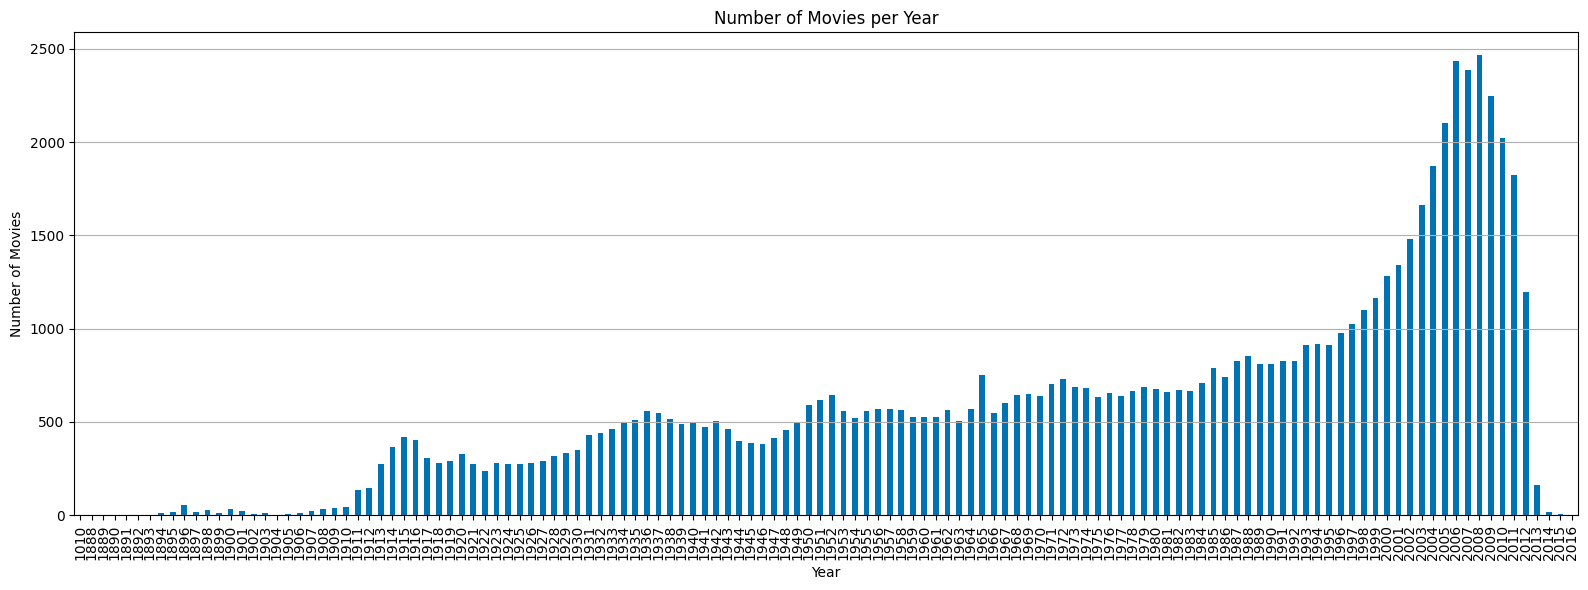

In [14]:
movie_counts_per_year = movies['Year'].value_counts().sort_index()

plt.figure(figsize=(16,6))
movie_counts_per_year.plot(kind='bar')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Movie Revenues')

Text(0.5, 0, 'Movie Index')

Text(0, 0.5, 'Revenue')

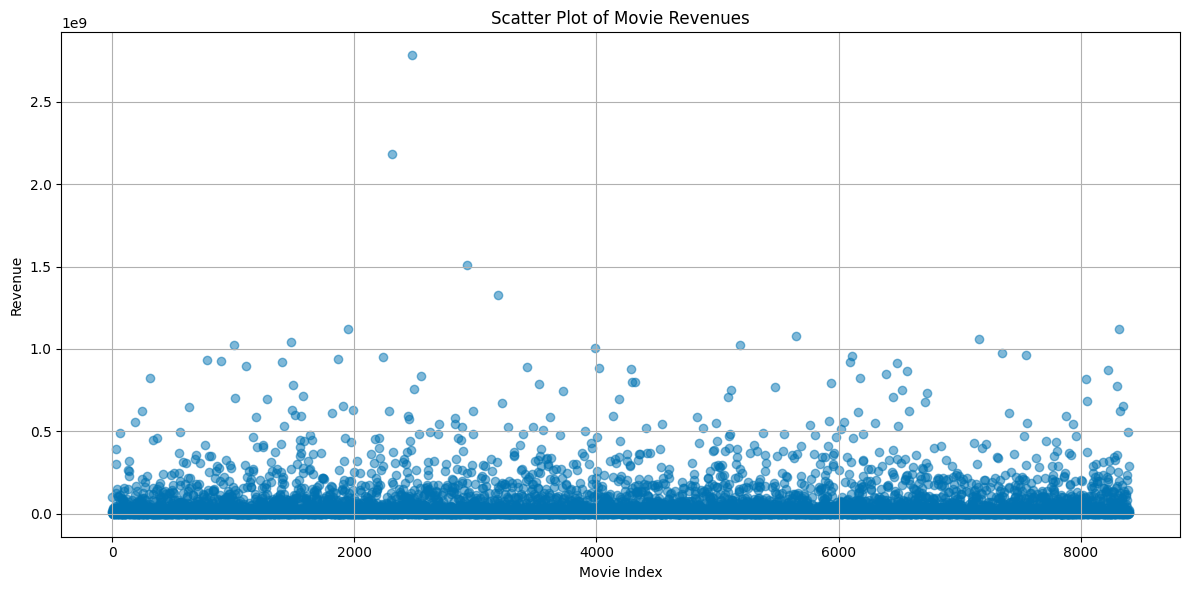

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(movies['Revenue'].dropna())), movies['Revenue'].dropna(), alpha=0.5)
plt.title('Scatter Plot of Movie Revenues')
plt.xlabel('Movie Index')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

(array([5.727e+03, 9.680e+02, 4.420e+02, 3.060e+02, 1.810e+02, 1.520e+02,
        1.180e+02, 9.300e+01, 6.100e+01, 4.900e+01, 4.200e+01, 3.800e+01,
        3.400e+01, 2.900e+01, 2.000e+01, 1.200e+01, 1.400e+01, 1.700e+01,
        8.000e+00, 1.100e+01, 4.000e+00, 1.000e+01, 8.000e+00, 3.000e+00,
        4.000e+00, 5.000e+00, 2.000e+00, 5.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

Text(0.5, 1.0, 'Distribution of Movie Revenues')

Text(0.5, 0, 'Revenue')

Text(0, 0.5, 'Number of Movies')

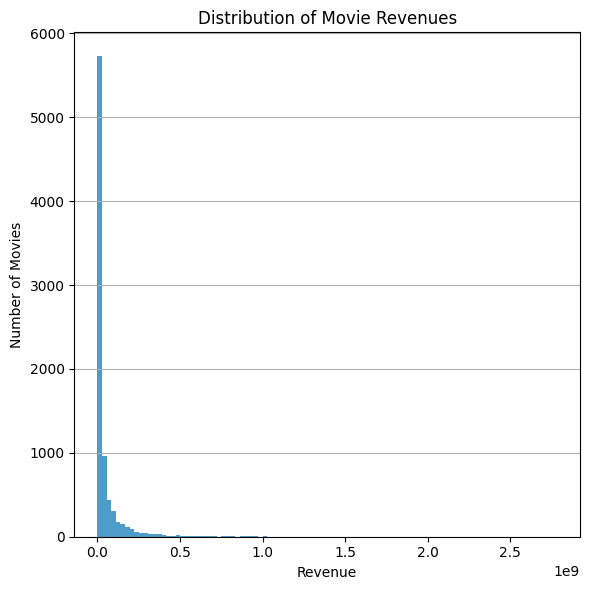

In [16]:
plt.figure(figsize=(6,6))
plt.hist(movies['Revenue'].dropna(), bins=100, alpha=0.7)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**TODO: check if this is normal, are all revenues on the same scale?**

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Movie Runtime')

Text(0.5, 0, 'Movie Index')

Text(0, 0.5, 'Runtime')

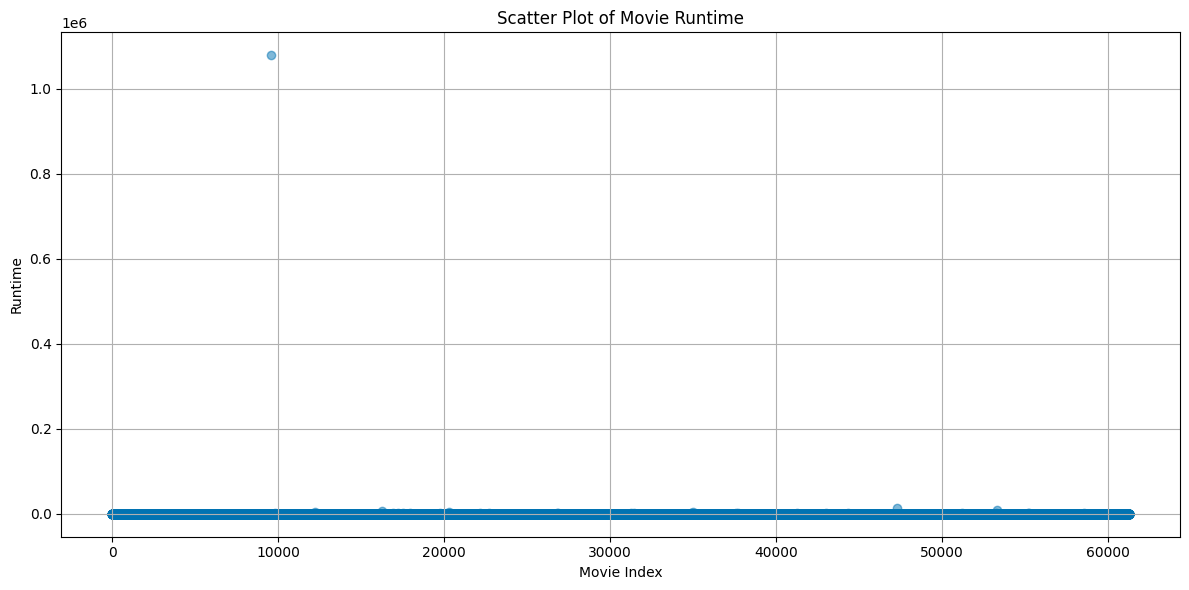

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(movies['Runtime'].dropna())), movies['Runtime'].dropna(), alpha=0.5)
plt.title('Scatter Plot of Movie Runtime')
plt.xlabel('Movie Index')
plt.ylabel('Runtime')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
movies[movies["Runtime"] > 1000]

# looks like there is a lot of cleaning to do here or simply ignore based on a max threshold, there are still some that are genuine like 95h => https://en.wikipedia.org/wiki/Matrjoschka 

,Wiki_ID,Name,Year,Revenue,Runtime,Languages,Countries,Genres,Month,Day
12804,10815585,Zero Tolerance,1995,NaN,1079281.00,English,United States of America,"Thriller,Crime Fiction,Action,Indie,Action/Adv...",<NA>,<NA>
16316,21689271,Paradise in Harlem,<NA>,NaN,5100.00,,United States of America,"Crime Fiction,Drama",<NA>,<NA>
21733,14545195,Matrjoschka,2006,NaN,5700.00,,Germany,"Indie,Documentary",4,23
23319,18983351,All You Need Is Love: The Story of Popular Music,<NA>,NaN,1005.00,English,,Documentary,<NA>,<NA>
23843,25930191,Swallow the Sun,2009,NaN,1560.00,,,,<NA>,<NA>
27036,36136594,Kai Koduttha Dheivam,1964,NaN,4875.27,Tamil,India,,7,18
30259,884506,The Burning of the Red Lotus Temple,1928,NaN,1620.00,,China,"Silent film,Martial Arts Film,Drama",5,13
41910,24873771,Thiruthani,2008,NaN,1440.00,Tamil,India,Action,<NA>,<NA>
46666,884435,The Cure for Insomnia,1987,NaN,5220.00,English,United States of America,Art film,1,31
54975,33483307,The New Adventures of Gigantor,1980,NaN,1530.00,Japanese,Japan,"Science Fiction,Anime,Action,Adventure,Animation",10,3


<Axes: ylabel='Countries'>

Text(0.5, 1.0, 'Country Distributions in Movies')

Text(0, 0.5, '')

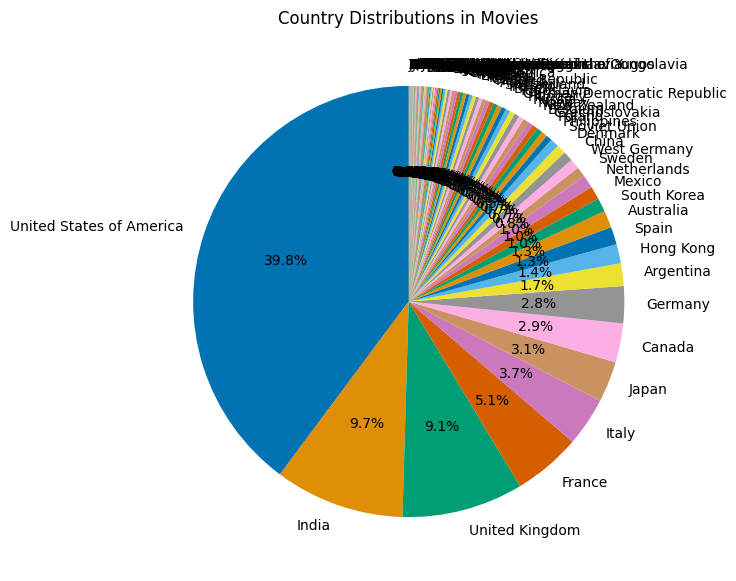

In [19]:
countries = movies.Countries.str.split(',').explode()

# Filter out empty values and count occurrences
country_counts = countries[countries != ''].value_counts()

country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 7))

# Display the plot
plt.title('Country Distributions in Movies')
plt.ylabel('')  # This is to remove the default 'Countries' y-label that pandas adds
plt.show()

In [20]:
country_counts

# some countries are present with different names because their name changed throught out history, depending on the chosen subject, we can regroup them
# Example: Germany, West Germany, German Democratic Republic, Weimar Republic, Nazi Germany

United States of America    34408
India                        8412
United Kingdom               7868
France                       4395
Italy                        3163
                            ...  
Crime                           1
Guinea-Bissau                   1
Turkmenistan                    1
Iraqi Kurdistan                 1
Ukranian SSR                    1
Name: Countries, Length: 145, dtype: int64

<Axes: ylabel='Languages'>

Text(0.5, 1.0, 'Language Distributions in Movies')

Text(0, 0.5, '')

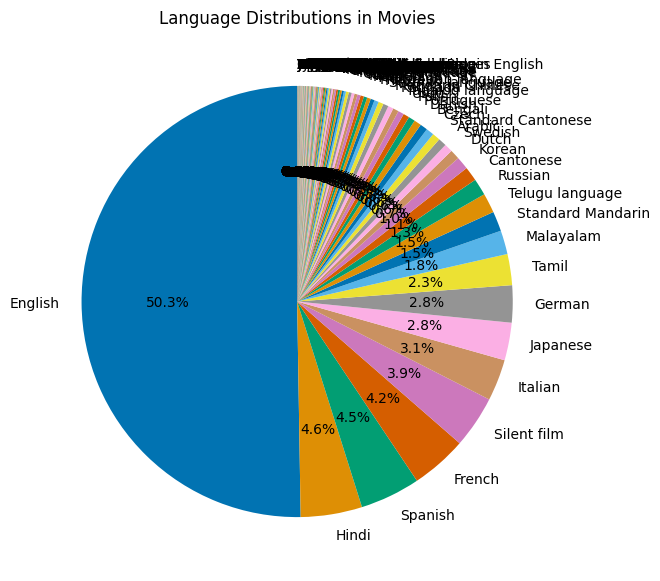

In [21]:
languages = movies.Languages.str.split(',').explode()

# Filter out empty values and count occurrences
language_counts = languages[languages != ''].value_counts()

language_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 7))

# Display the plot
plt.title('Language Distributions in Movies')
plt.ylabel('')  # This is to remove the default 'Countries' y-label that pandas adds
plt.show()

In [22]:
language_counts

# maybe clean further by putting some languages together if needed

English                                 40891
Hindi                                    3744
Spanish                                  3673
French                                   3422
Silent film                              3183
                                        ...  
Australian Aboriginal Pidgin English        1
Krio                                        1
Tok Pisin                                   1
Picard                                      1
Kuna language                               1
Name: Languages, Length: 211, dtype: int64

In [23]:
movies.dtypes

Wiki_ID        int64
Name          string
Year           Int64
Revenue      float64
Runtime      float64
Languages     string
Countries     string
Genres        string
Month          Int64
Day            Int64
dtype: object

In [24]:
"Name empty", ((movies['Name'].isna() | (movies['Name'] == '')).sum()) / len(movies) * 100, f"{((movies['Name'].isna() | (movies['Name'] == '')).sum())} / {len(movies)}" #no nans in name
"Year empty", (movies['Year'].isna()).sum() / len(movies) * 100, f"{(movies['Year'].isna()).sum()} / {len(movies)}" # 8% of nans in year
"Revenue empty", (movies['Revenue'].isna()).sum() / len(movies) * 100, f"{(movies['Revenue'].isna()).sum()} / {len(movies)}" # 90% of nans in revenue
"Runtime empty", (movies['Runtime'].isna()).sum() / len(movies) * 100, f"{(movies['Runtime'].isna()).sum()} / {len(movies)}" # 25% of nans in runtime
"Languages empty", ((movies['Languages'].isna() | (movies['Languages'] == '')).sum()) / len(movies) * 100, f"{((movies['Languages'].isna() | (movies['Languages'] == '')).sum())} / {len(movies)}"
"Countries empty", ((movies['Countries'].isna() | (movies['Countries'] == '')).sum()) / len(movies) * 100, f"{((movies['Countries'].isna() | (movies['Countries'] == '')).sum())} / {len(movies)}"
"Genres empty", ((movies['Genres'].isna() | (movies['Genres'] == '')).sum()) / len(movies) * 100, f"{((movies['Genres'].isna() | (movies['Genres'] == '')).sum())} / {len(movies)}"
"Month empty", (movies['Month'].isna()).sum() / len(movies) * 100, f"{(movies['Month'].isna()).sum()} / {len(movies)}"
"Day empty", (movies['Day'].isna()).sum() / len(movies) * 100, f"{(movies['Day'].isna()).sum()} / {len(movies)}"

# Name, Year, Languages, Countries, Genres seem to be the "best"/more appropriate columns for the project 

('Name empty', 0.0, '0 / 81741')

('Year empty', 8.443743042047442, '6902 / 81741')

('Revenue empty', 89.72241592346558, '73340 / 81741')

('Runtime empty', 25.018044800039146, '20450 / 81741')

('Languages empty', 16.96211203679916, '13865 / 81741')

('Countries empty', 9.975410136895805, '8154 / 81741')

('Genres empty', 2.8064251721902105, '2294 / 81741')

('Month empty', 47.80220452404546, '39074 / 81741')

('Day empty', 51.83200597007621, '42368 / 81741')